In [1]:
import os
os.environ['OPENAI_API_KEY'] = "EXAMPLES"

# 모델 I/O
##### 모든 언어 모델 애플리케이션의 핵심 요소는 모델이다.
##### Langchain은 모든 언어 모델과 인터페이스 할 수 있는 블록을 제공한다.
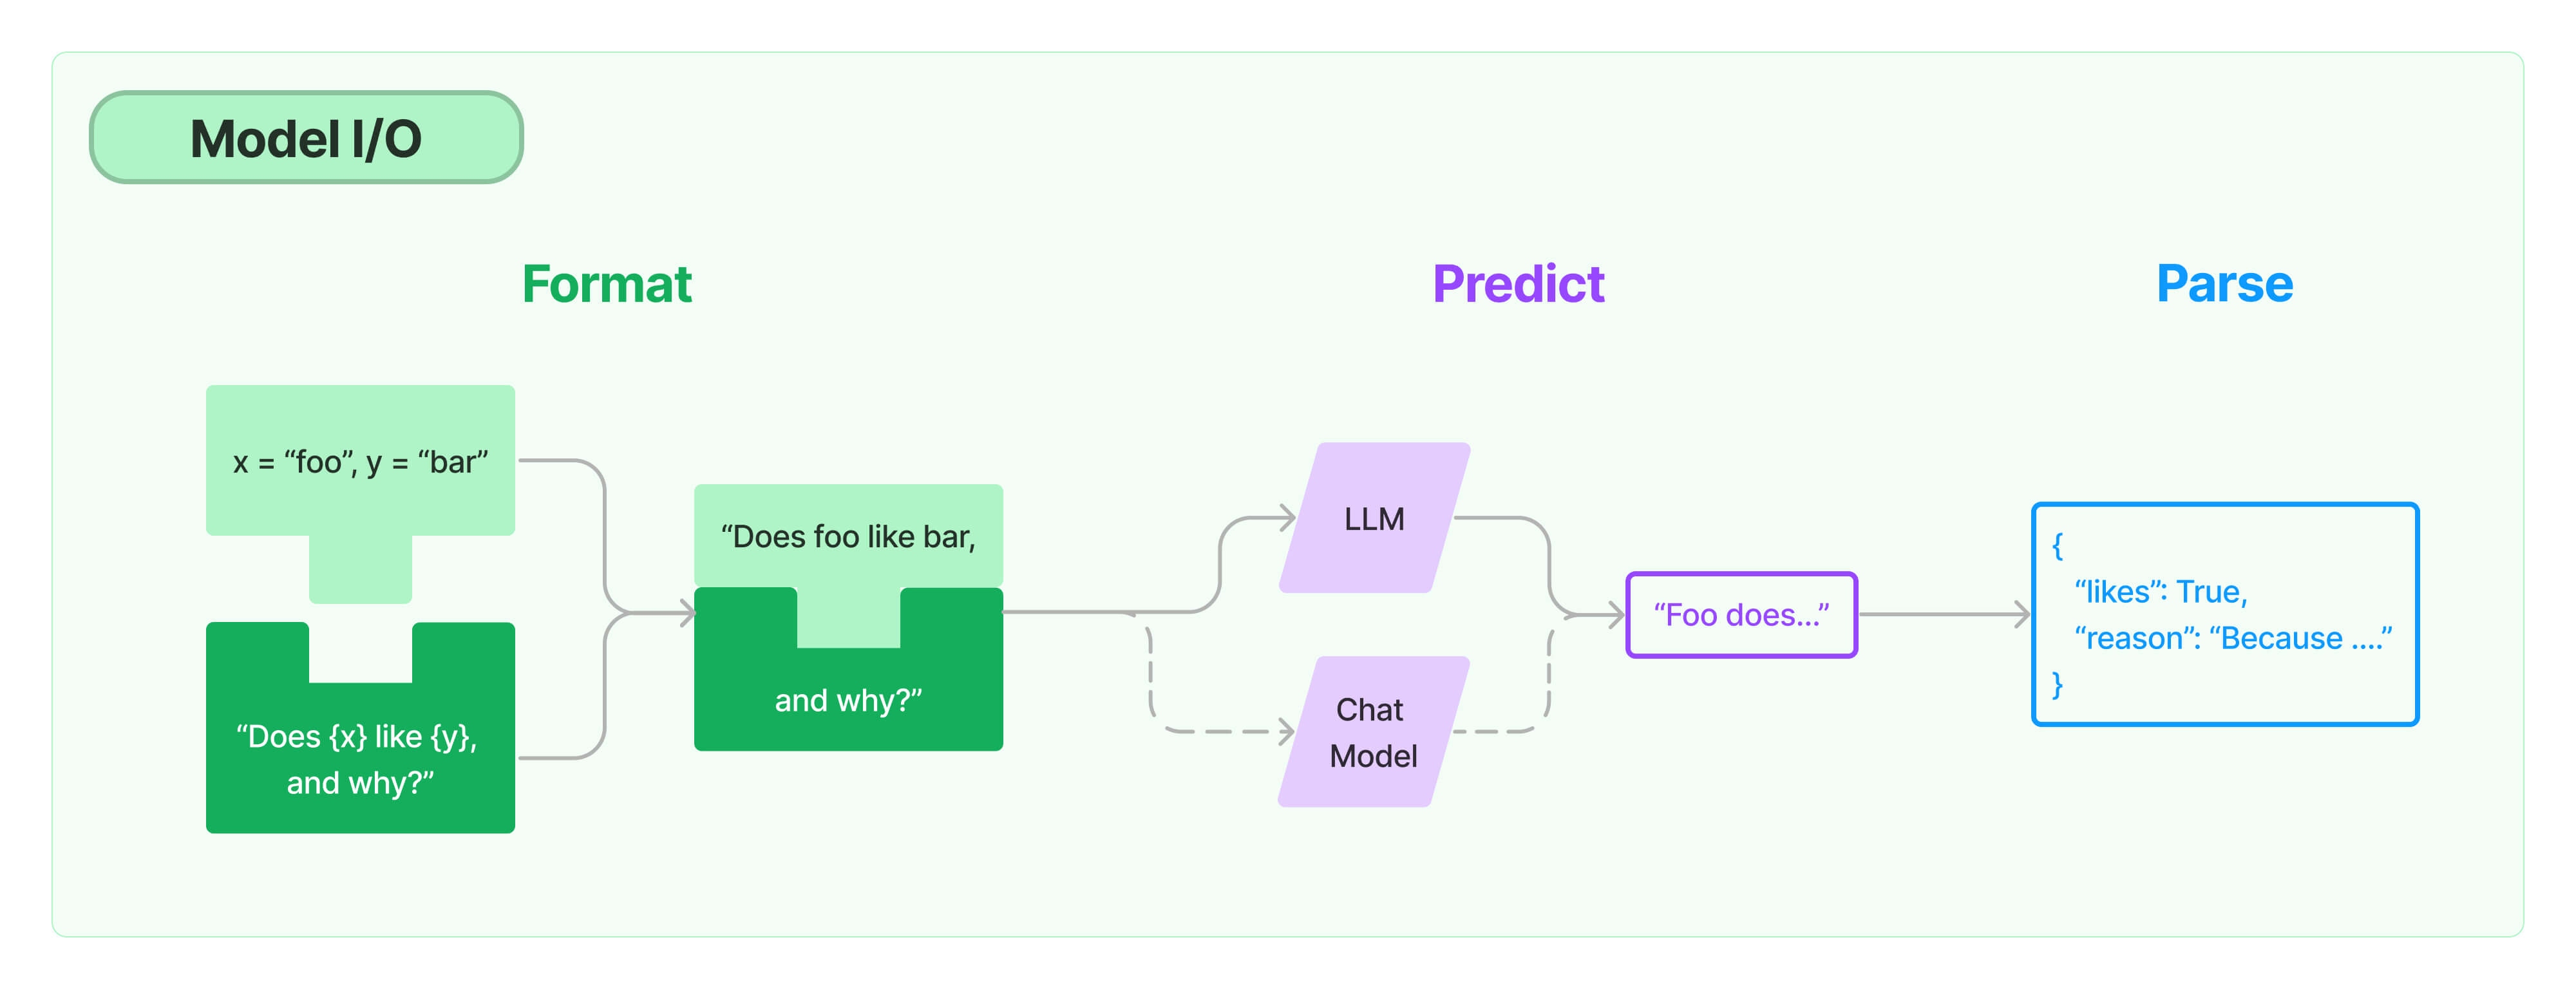

# QuickStart
##### 1. LLM 과 ChatModel이라는 두 가지 유형을 모델 소개
##### 2. PromptTemplate을 사용하여 모델에 대한 입력 형식 지정
##### 3. 출력 구문 분석기를 사용하여 출력 작업 수행

## LLM / ChatModel

In [ ]:
!pip install langchain-openai

In [ ]:
!pip install langchain

In [3]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI

llm = OpenAI()
chat_model = ChatOpenAI(model="gpt-3.5-turbo-0125")

##### llm과 chat_model 둘 다 특정 모델에 대한 구성을 나타내는 개체이다.
##### 두 모델의 차이점은 입력 및 출력 스키마이다.
##### LLM 객체는 문자열을 입력 및 출력 문자열로 사용하는 반면에 ChatModel 개체는 메시지 목록을 입력으로 사용하고 메시지를 출력한다.

In [6]:
from langchain_core.messages import HumanMessage

text = "What would be a good company name for a company that makes colorful socks?"
messages = [HumanMessage(content=text)]
print(llm.invoke(text))
print(chat_model.invoke(messages))



"Rainbow Feet Co."
content='Rainbow Footwear Co.' response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 22, 'total_tokens': 28}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_3bc1b5746c', 'finish_reason': 'stop', 'logprobs': None}


##### LLM은 문자열을 반환하고 ChatModel은 메시지를 반환한다.

## 프롬프트 템플릿
##### LLM 응용 프로그램은 사용자 입력을 LLM에 직접 전달하지 않는다.
##### 현재 특정 작업에 대한 추가 컨텍스트를 제공하는 프롬프트 템플릿을 사용하여 사용자 입력을 추가한다.

In [9]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}?")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks?'

##### ChatPromptTemplate를 사용해서 콘텐츠에 대한 정보뿐만 아니라 각 메시지에 대한 정보도 출력한다.

In [10]:
from langchain.prompts.chat import ChatPromptTemplate

template = "You are a helpful assistant that translates {input_language} to {output_language}."
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])

chat_prompt.format_messages(input_language="English", output_language="French", text="I love programming.")

[SystemMessage(content='You are a helpful assistant that translates English to French.'),
 HumanMessage(content='I love programming.')]

## 출력 파서
##### OutputParser


*   LLM은 텍스트를 구조화된 정보로 변환
*   ChatMessage는 문자열로 변환
*   메시지외에 호출에서 반환된 추가 정보를 문자열로 변환




In [11]:
from langchain.output_parsers import CommaSeparatedListOutputParser

# 쉼표로 구분된 값 목록을 구문 분석 중
output_parser = CommaSeparatedListOutputParser()
output_parser.parse("hi, bye")

['hi', 'bye']

## LCEL로 구성
##### 하나의 체인으로 구성할 수 있다.
##### 체인은 입력 변수를 가져와 프롬프트 템플릿에 전달하여 프롬프트를 생성하고, 프롬프트를 언어 모델에 전달한 다음  출력 구문 분석기를 통해 출력을 전달한다.

In [12]:
template = "Generate a list of 5 {text}.\n\n{format_instructions}"

chat_prompt = ChatPromptTemplate.from_template(template)
chat_prompt = chat_prompt.partial(format_instructions=output_parser.get_format_instructions())
chain = chat_prompt | chat_model | output_parser
chain.invoke({"text": "colors"})

['red', 'blue', 'green', 'yellow', 'purple']